In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
plt.style.use('ggplot')
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import statsmodels.api as sm
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, make_scorer
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv('data/ie/top200_new_ireland.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,id,album,artist_x,explicit,popularity,danceability,energy,key,...,duration_ms,time_signature,title,rank,date,artist_y,region,chart,trend,streams
0,1,33223,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),"Clean Bandit, Sean Paul, Anne-Marie",False,77,0.720,0.763,9,...,4.184800,4,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-01,Clean Bandit,Ireland,top200,SAME_POSITION,24914.0
1,11,68700,5aAx2yezTd8zXrkmtKl66Z,Starboy,"The Weeknd, Daft Punk",True,4,0.681,0.594,7,...,3.840883,4,Starboy,2,2017-01-01,"The Weeknd, Daft Punk",Ireland,top200,SAME_POSITION,20407.0
2,17,40120,5uCax9HTNlzGybIStD3vDh,Back from the Edge,James Arthur,False,86,0.358,0.557,10,...,3.524450,4,Say You Won't Let Go,3,2017-01-01,James Arthur,Ireland,top200,MOVE_UP,18749.0
3,26,85171,3AsAuGTaDQzavZZThyYlop,Sexual,"NEIKED, Dyo",False,0,0.803,0.569,2,...,3.148150,4,Sexual,4,2017-01-01,"NEIKED, Dyo",Ireland,top200,MOVE_DOWN,18662.0
4,39,751025,4b4KcovePX8Ke2cLIQTLM0,Night & Day (Night Edition),"The Vamps, Matoma",False,0,0.544,0.809,8,...,3.294000,4,All Night,5,2017-01-01,"The Vamps, Matoma",Ireland,top200,MOVE_DOWN,16781.0


In [4]:
df['trend'].unique()

array(['SAME_POSITION', 'MOVE_UP', 'MOVE_DOWN', 'NEW_ENTRY'], dtype=object)

In [6]:
def label_trend (row):
    if(row['trend'] == 'SAME_POSITION'):
        return 0
    if(row['trend'] == 'MOVE_UP'):
        return 1
    if(row['trend'] == 'MOVE_DOWN'):
        return -1
    if(row['trend'] == 'NEW_ENTRY'):
        return 1

In [7]:
df['trend_score']=df.apply (lambda row: label_trend(row), axis=1)

In [8]:
df=df.drop(['Unnamed: 0','id','album','artist_x','explicit','type','time_signature','artist_y','region','chart'],axis=1)
df.head()

,Unnamed: 0.1,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,title,rank,date,trend,streams,trend_score
0,33223,77,0.720,0.763,9,-4.068,0,0.0523,0.4060,0.000000,0.1800,0.742,101.965,4.184800,Rockabye (feat. Sean Paul & Anne-Marie),1,2017-01-01,SAME_POSITION,24914.0,0
1,68700,4,0.681,0.594,7,-7.028,1,0.2820,0.1650,0.000003,0.1340,0.535,186.054,3.840883,Starboy,2,2017-01-01,SAME_POSITION,20407.0,0
2,40120,86,0.358,0.557,10,-7.398,1,0.0590,0.6950,0.000000,0.0902,0.494,85.043,3.524450,Say You Won't Let Go,3,2017-01-01,MOVE_UP,18749.0,1
3,85171,0,0.803,0.569,2,-7.392,1,0.0739,0.0623,0.000000,0.0830,0.809,107.986,3.148150,Sexual,4,2017-01-01,MOVE_DOWN,18662.0,-1
4,751025,0,0.544,0.809,8,-5.098,1,0.0363,0.0038,0.000000,0.3230,0.448,145.017,3.294000,All Night,5,2017-01-01,MOVE_DOWN,16781.0,-1


In [9]:
df=df.drop(['Unnamed: 0.1'],axis=1)

In [79]:
df['streams'].describe()

count    352390.000000
mean      11129.063359
std       10180.724263
min        2003.000000
25%        5634.000000
50%        7357.000000
75%       12671.000000
max      319678.000000
Name: streams, dtype: float64

In [10]:
#df['stream_bins'] = pd.cut(x=df['streams'], bins=[2003, 5634,7357,12671, 319678])
df['score'] = pd.cut(x=df['streams'], bins=[2002, 5634,7357,12671, 319678], labels=[0,1,2,3])


In [11]:
df['score'].value_counts()

0    88139
2    88097
3    88092
1    88061
Name: score, dtype: int64

In [12]:
df.isna().sum()

popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
title               0
rank                0
date                0
trend               0
streams             0
trend_score         0
score               0
dtype: int64

In [13]:
df=df.dropna()

In [14]:
df.isna().sum()

popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
title               0
rank                0
date                0
trend               0
streams             0
trend_score         0
score               0
dtype: int64

In [15]:
df=df[df['date'] ==df.groupby('title')['date'].transform('max')]

In [16]:
df.reset_index(inplace=True)

In [17]:
df=df.drop(['title','date','streams','trend','index'],axis=1)

In [18]:
y = df['score']
X = df.drop('score', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [19]:
#Decision tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)
# Make predictions using test set 
y_pred = dt.predict(X_test)
# Check the AUC of predictions
print(metrics.confusion_matrix(y_test, y_pred))

[[439 178  30   1]
 [150 144  37   5]
 [ 19  28  53   6]
 [  1   4   7  13]]


In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       648
           1       0.41      0.43      0.42       336
           2       0.42      0.50      0.45       106
           3       0.52      0.52      0.52        25

    accuracy                           0.58      1115
   macro avg       0.52      0.53      0.52      1115
weighted avg       0.59      0.58      0.59      1115



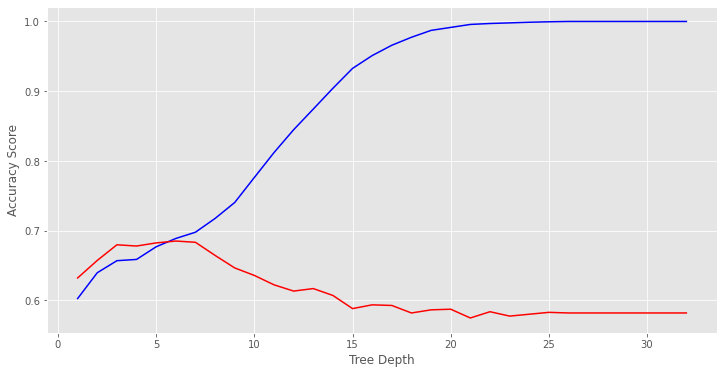

In [21]:
max_depths = np.linspace(1,32,32,endpoint=True)
# As review, linspace returns evenly spaced numbers over a specified interval.
train_results=[]
test_results=[]
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    #false_positive_rate, true_positive_rate, thresholds = metrics.auc(y_train, train_pred)
    auc = metrics.accuracy_score(y_train, train_pred)
    # add auc score to the previous train results
    train_results.append(auc)
    y_pred = dt.predict(X_test)
    #false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test, y_pred)
    auc = metrics.accuracy_score(y_test, y_pred)
    # add score to previous test results
    test_results.append(auc)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('Accuracy Score')
plt.xlabel('Tree Depth')
plt.legend
plt.show()

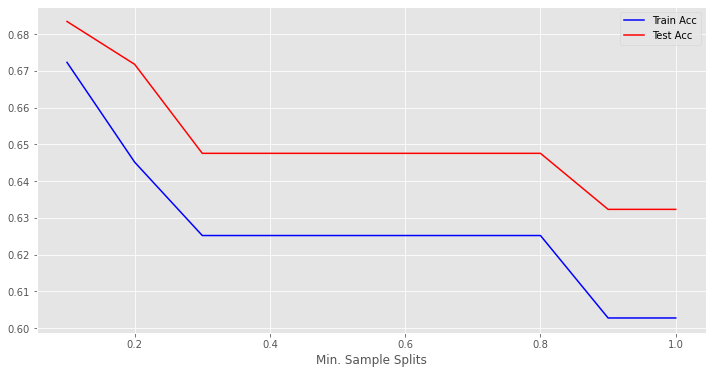

In [22]:
min_samples_splits = np.linspace(0.1,1.0,10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier (criterion = 'entropy', min_samples_split = min_samples_split, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    acc = metrics.accuracy_score(y_train, train_pred)
    train_results.append(acc)
    y_pred = dt.predict(X_test)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    test_results.append(acc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label = 'Train Acc')
plt.plot(min_samples_splits, test_results, 'r',label = 'Test Acc')
plt.xlabel('Min. Sample Splits')
plt.legend()
plt.show()

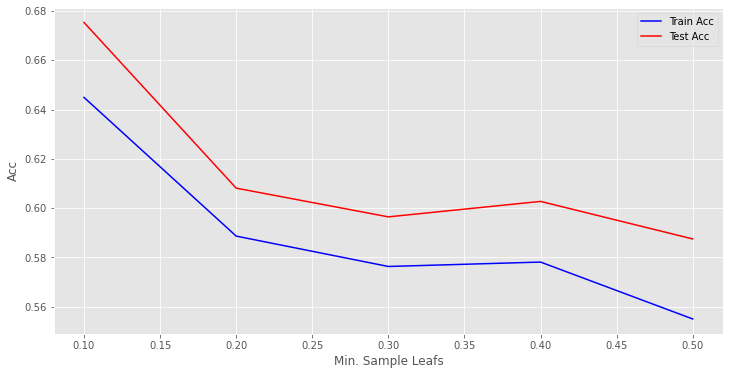

In [23]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs=np.linspace(0.1,0.5,5, endpoint = True)
train_results=[]
test_results=[]
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = min_samples_leaf, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    acc = metrics.accuracy_score(y_train, train_pred)
    train_results.append(acc)
    y_pred = dt.predict(X_test)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve (y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    test_results.append(acc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train Acc')
plt.plot(min_samples_leafs, test_results, 'r', label='Test Acc')
plt.ylabel('Acc')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

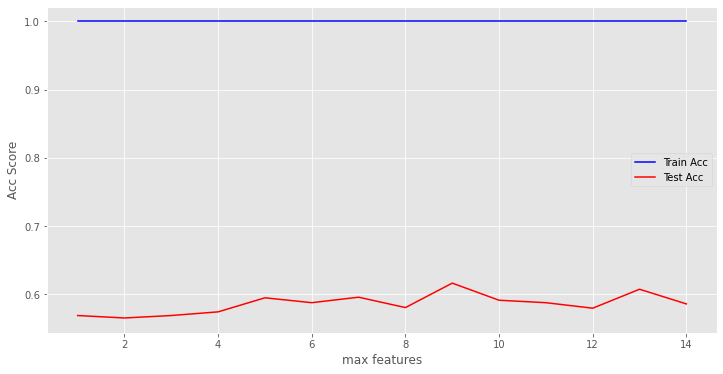

In [24]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion = 'entropy', max_features = max_feature, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    acc = metrics.accuracy_score(y_train, train_pred)
    train_results.append(acc)
    y_pred = dt.predict(X_test)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    test_results.append(acc)
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label = 'Train Acc')
plt.plot(max_features, test_results, 'r', label = 'Test Acc')
plt.ylabel('Acc Score')
plt.xlabel('max features')
plt.legend()
plt.show()

In [25]:
dt2 = DecisionTreeClassifier(criterion='entropy',
                           max_features=9,
                           max_depth = 6,
                           min_samples_split = 0.1,
                           min_samples_leaf = 0.1,
                           random_state = 42)

dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=9,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       random_state=42)

In [26]:
y_pred = dt2.predict(X_test)
# Calculate accuracy 
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy is: {0}'.format(acc))
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test,y_pred,rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is: 65.47085201793722

Confusion Matrix
----------------


Predicted,0,1,2,All
True,,,,
0,579,52,17,648
1,235,77,24,336
2,22,10,74,106
3,2,5,18,25
All,838,144,133,1115


In [27]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[579  52  17   0]
 [235  77  24   0]
 [ 22  10  74   0]
 [  2   5  18   0]]
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       648
           1       0.53      0.23      0.32       336
           2       0.56      0.70      0.62       106
           3       0.00      0.00      0.00        25

    accuracy                           0.65      1115
   macro avg       0.45      0.46      0.43      1115
weighted avg       0.62      0.65      0.61      1115



In [28]:
import graphviz
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


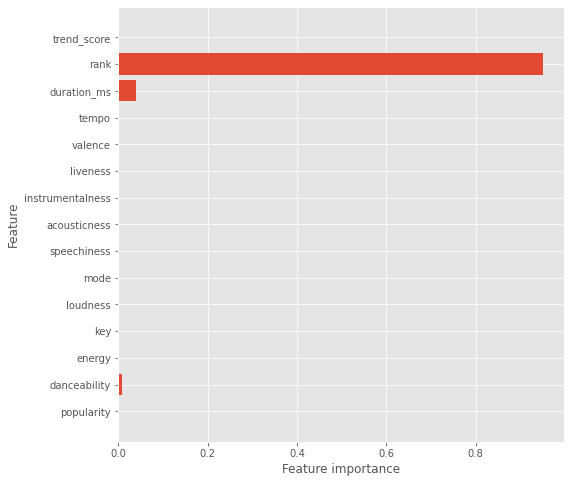

In [29]:
plot_feature_importances(dt2)

In [30]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.fit_transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,rank,trend_score
0,0.544879,0.568096,-1.192063,0.774792,-0.010010,0.783985,-0.426770,0.648014,-0.204253,-0.849556,-0.144873,-0.242546,-0.654334,0.822404,-1.325206
1,1.147944,0.110859,0.189419,-0.867504,-1.910414,0.783985,-0.661679,-0.529934,-0.195877,-0.475651,-1.404162,-0.711682,-0.190262,0.199136,0.762345
2,0.243346,0.594224,-1.078738,-1.141220,-0.207570,-1.275535,0.025173,1.444286,-0.204253,-0.524664,-0.057725,-0.929323,-0.869453,0.470122,-1.325206
3,0.167963,-0.588061,-0.172141,-0.867504,-0.221402,0.783985,-0.601250,-0.761925,-0.204253,-0.695512,-1.343159,-1.582105,0.171300,0.388827,-1.325206
4,0.544879,-0.320250,-1.219045,-1.414936,-1.987026,0.783985,-0.632741,2.179307,-0.204128,-0.650700,-0.314811,1.102245,0.755904,-0.830610,0.762345


In [31]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [32]:
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

[[510 132   6   0]
 [231  95   9   1]
 [ 27  41  32   6]
 [  5   4   7   9]]
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       648
           1       0.35      0.28      0.31       336
           2       0.59      0.30      0.40       106
           3       0.56      0.36      0.44        25

    accuracy                           0.58      1115
   macro avg       0.54      0.43      0.47      1115
weighted avg       0.56      0.58      0.56      1115



In [33]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=34):
    best_k = 0
    best_score = 0.0
    for k in range (min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score (y_test, preds, average='micro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    print ("Best value for k: {}".format(best_k))
    print ("F1-Score: {}".format(best_score))

In [34]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best value for k: 33
F1-Score: 0.6385650224215247


In [35]:
# Instantiate KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=33)

# Fit the classifier
clf2.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf2.predict(scaled_data_test)

In [36]:
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

[[603  45   0   0]
 [271  62   3   0]
 [ 41  26  36   3]
 [  6   2   6  11]]
              precision    recall  f1-score   support

           0       0.65      0.93      0.77       648
           1       0.46      0.18      0.26       336
           2       0.80      0.34      0.48       106
           3       0.79      0.44      0.56        25

    accuracy                           0.64      1115
   macro avg       0.67      0.47      0.52      1115
weighted avg       0.61      0.64      0.58      1115



In [37]:
#Random forest
# Instantiate a BaggingClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                                 n_estimators=20)

In [38]:
# Fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=20)

In [39]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.6848362494392104

In [40]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.6887892376681615

In [41]:
# Test set predictions
pred = bagged_tree.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[572  62  14   0]
 [204 112  20   0]
 [ 12  21  72   1]
 [  1   6   6  12]]
              precision    recall  f1-score   support

           0       0.72      0.88      0.80       648
           1       0.56      0.33      0.42       336
           2       0.64      0.68      0.66       106
           3       0.92      0.48      0.63        25

    accuracy                           0.69      1115
   macro avg       0.71      0.59      0.63      1115
weighted avg       0.67      0.69      0.67      1115



In [42]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=6)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [43]:
# Training accuracy score
forest.score(X_train, y_train)

0.6763122476446837

In [44]:
# Test accuracy score
forest.score(X_test, y_test)

0.6717488789237668

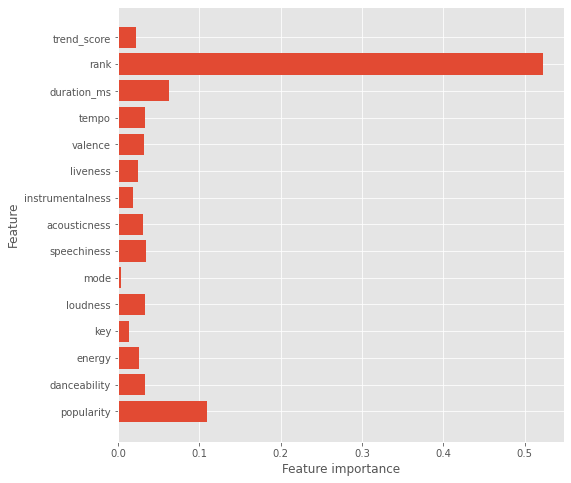

In [45]:
plot_feature_importances(forest)

In [46]:
# Test set predictions for forest:
pred = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[631  10   7   0]
 [279  42  15   0]
 [ 31   7  68   0]
 [  8   2   7   8]]
              precision    recall  f1-score   support

           0       0.66      0.97      0.79       648
           1       0.69      0.12      0.21       336
           2       0.70      0.64      0.67       106
           3       1.00      0.32      0.48        25

    accuracy                           0.67      1115
   macro avg       0.76      0.52      0.54      1115
weighted avg       0.68      0.67      0.60      1115



In [47]:
#GridSearch random forest
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Val Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Val Score for Random Forest Classifier: 66.24%


In [48]:
rf_param_grid = {
    'n_estimators' : [10,30,100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2,6,10],
    'min_samples_split' : [5,10],
    'min_samples_leaf' : [3,6]
    
}

In [49]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)


print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 66.80%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [50]:
forest2 = RandomForestClassifier(n_estimators=100, max_depth=None, 
                                criterion = 'gini', min_samples_leaf=3,
                                min_samples_split=10)
forest2.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=10)

In [51]:
# Training accuracy score
forest2.score(X_train, y_train)

0.9147599820547331

In [52]:
# Test accuracy score
forest2.score(X_test, y_test)

0.6816143497757847

In [53]:
# Test set predictions for final forest:
pred = forest2.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[574  64  10   0]
 [217 101  18   0]
 [ 20  15  70   1]
 [  2   5   3  15]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       648
           1       0.55      0.30      0.39       336
           2       0.69      0.66      0.68       106
           3       0.94      0.60      0.73        25

    accuracy                           0.68      1115
   macro avg       0.72      0.61      0.65      1115
weighted avg       0.66      0.68      0.65      1115



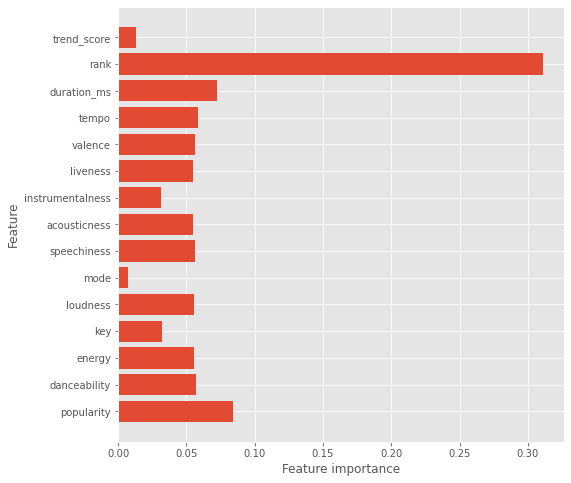

In [54]:
plot_feature_importances(forest2)

In [55]:
#using the more importantfeatures - remove mode, trend_score,key, instrumentalness
X = df[['rank','popularity', 'duration_ms','valence',
        'danceability','tempo', 'liveness', 'acousticness', 'speechiness','loudness','energy']]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [57]:
#untuned decision tree
dt4 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [60]:
# Make predictions using test set 
y_pred = dt4.predict(X_test)

# Check the AUC of predictions
print(metrics.accuracy_score(y_test, y_pred))

0.5730941704035875


In [61]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[445 178  25   0]
 [166 132  37   1]
 [ 18  28  49  11]
 [  2   3   7  13]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       648
           1       0.39      0.39      0.39       336
           2       0.42      0.46      0.44       106
           3       0.52      0.52      0.52        25

    accuracy                           0.57      1115
   macro avg       0.51      0.52      0.51      1115
weighted avg       0.58      0.57      0.58      1115



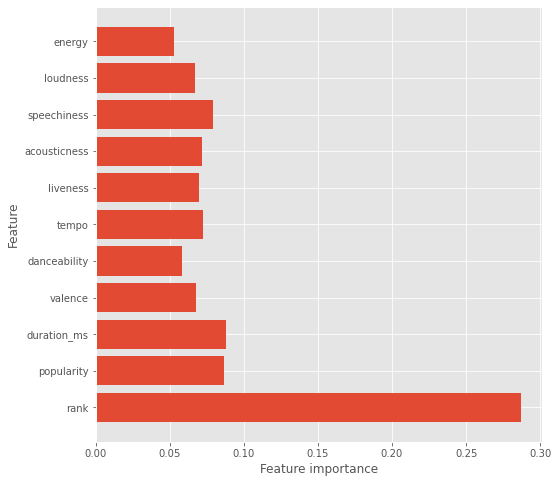

In [62]:
plot_feature_importances(dt4)

In [63]:
# Instantiate a BaggingClassifier
bagged_tree2 = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                                 n_estimators=20)

In [64]:
# Fit to the training data
bagged_tree2.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=20)

In [65]:
# Training accuracy score
bagged_tree2.score(X_train, y_train)

0.6796769851951547

In [66]:
# Test accuracy score
bagged_tree2.score(X_test, y_test)

0.6977578475336322

In [67]:
# Test set predictions
pred = bagged_tree2.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[564  71  13   0]
 [187 129  20   0]
 [ 11  21  73   1]
 [  1   6   6  12]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       648
           1       0.57      0.38      0.46       336
           2       0.65      0.69      0.67       106
           3       0.92      0.48      0.63        25

    accuracy                           0.70      1115
   macro avg       0.72      0.61      0.64      1115
weighted avg       0.68      0.70      0.68      1115



In [68]:
#untuned random forest
# Instantiate and fit an Untuned RandomForestClassifier
forest3 = RandomForestClassifier(n_estimators=100, max_depth=6)
forest3.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [69]:
forest3.score(X_train, y_train)

0.6843876177658142

In [70]:
forest3.score(X_test, y_test)

0.6825112107623318

In [71]:
# Test set predictions
pred = forest3.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[619  21   8   0]
 [258  58  20   0]
 [ 23  10  72   1]
 [  2   5   6  12]]
              precision    recall  f1-score   support

           0       0.69      0.96      0.80       648
           1       0.62      0.17      0.27       336
           2       0.68      0.68      0.68       106
           3       0.92      0.48      0.63        25

    accuracy                           0.68      1115
   macro avg       0.73      0.57      0.59      1115
weighted avg       0.67      0.68      0.62      1115



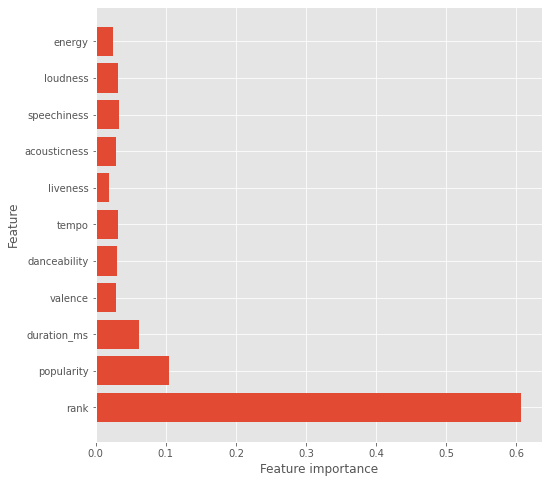

In [72]:
plot_feature_importances(forest3)

In [73]:
dt_clf2 = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf2, X_train, y_train, cv=3) 
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 55.25%


In [74]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [75]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf2, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [76]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 69.79%
Mean Test Score: 69.78%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [77]:
tree_clf3 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf = 3,
                                  min_samples_split = 2)
tree_clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [78]:
# Test set predictions for tree:
pred = tree_clf3.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[560  80   8   0]
 [179 139  17   1]
 [ 16  20  64   6]
 [  0   7   3  15]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       648
           1       0.57      0.41      0.48       336
           2       0.70      0.60      0.65       106
           3       0.68      0.60      0.64        25

    accuracy                           0.70      1115
   macro avg       0.67      0.62      0.64      1115
weighted avg       0.68      0.70      0.68      1115



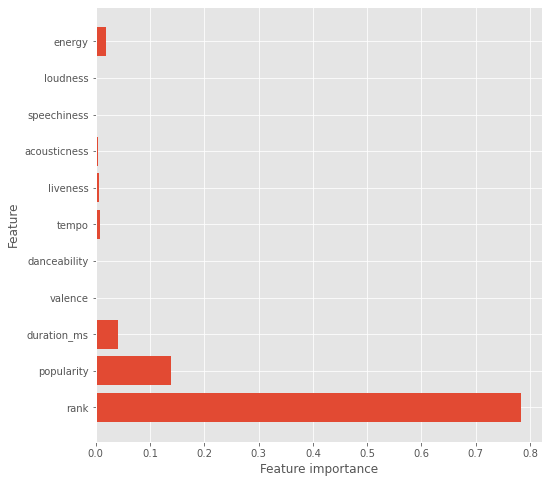

In [79]:
plot_feature_importances(tree_clf3)

In [80]:
forest4 = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(forest4, X_train, y_train, cv=3))

print(f"Mean Cross Val Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Val Score for Random Forest Classifier: 66.29%


In [81]:
rf_param_grid = {
    'n_estimators' : [10,30,100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2,6,10],
    'min_samples_split' : [5,10],
    'min_samples_leaf' : [3,6]
    
}

In [82]:
rf_grid_search = GridSearchCV(forest4, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)


print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 67.14%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [83]:
forest4 = RandomForestClassifier(n_estimators=100, max_depth=None, 
                                criterion = 'gini', min_samples_leaf=3,
                                min_samples_split=10)
forest4.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=10)

In [84]:
# Training accuracy score
forest4.score(X_train, y_train)

0.9102736653207717

In [85]:
# Testing accuracy score
forest4.score(X_test, y_test)

0.7076233183856502

In [86]:
# Test set predictions for final forest:
pred = forest4.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[571  70   7   0]
 [188 132  16   0]
 [ 13  20  72   1]
 [  2   5   4  14]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       648
           1       0.58      0.39      0.47       336
           2       0.73      0.68      0.70       106
           3       0.93      0.56      0.70        25

    accuracy                           0.71      1115
   macro avg       0.74      0.63      0.67      1115
weighted avg       0.69      0.71      0.69      1115



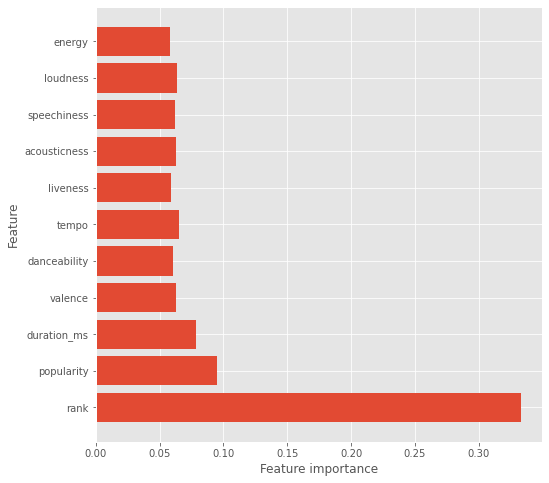

In [87]:
plot_feature_importances(forest4)

In [92]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [118]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)
params = {
    'max_depth': 6,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 4,
    # Set number of GPUs if available   
    'n_gpus': 0
}
bst = xgb.train(params, dtrain)
pred = bst.predict(dtest)
# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[18:23:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:576: 
Parameters: { "n_gpus" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:23:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[580  61   7   0]
 [191 126  18   1]
 [ 13  22  71   0]
 [  0   6   5  14]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       648
           1       0.59      0.38      0.46       336
           2       0.

In [ ]:
model = xgb.XGBClassifier()
param_dist = {"max_depth": [1,2,3,4,5,6,7,10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [10,20,50,200],
              "learning_rate": [#0.01,0.02,0.03,0.05 
                  0.1,0.16,0.20,0.50],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 5, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

model = xgb.XGBClassifier(max_depth=1, min_child_weight=1,  n_estimators=50,\
                          n_jobs=-1 , verbose=1,learning_rate=0.5)
model.fit(X_train,y_train)

In [130]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 6,
 'n_estimators': 20}

In [131]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [137]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)
params = {
    'max_depth': 5,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 4,
    'learning_rate':0.1,
}
model=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=6,
              monotone_constraints='()', n_estimators=20, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
model.fit(X_train,y_train)
pred=model.predict(X_test)
# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[23:08:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[583  55  10   0]
 [201 116  19   0]
 [ 13  21  72   0]
 [  1   6   6  12]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       648
           1       0.59      0.35      0.43       336
           2       0.67      0.68      0.68       106
           3       1.00      0.48      0.65        25

    accuracy                           0.70      1115
   macro avg       0.75      0.60      0.64      1115
weighted avg       0.69      0.70      0.68      1115

